# Machine Learning - Supervised learning - Classification

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploring the data</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Let's-do-it" data-toc-modified-id="Let's-do-it-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Let's do it</a></span><ul class="toc-item"><li><span><a href="#Let's-train-a-model" data-toc-modified-id="Let's-train-a-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Let's train a model</a></span></li><li><span><a href="#Let's-create-a-prediction-column-for-the-entire-dataframe" data-toc-modified-id="Let's-create-a-prediction-column-for-the-entire-dataframe-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Let's create a prediction column for the entire dataframe</a></span></li><li><span><a href="#Confusion-matrix-with-our-data" data-toc-modified-id="Confusion-matrix-with-our-data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Confusion matrix with our data</a></span></li></ul></li><li><span><a href="#We-do-the-same-with-many-predictors" data-toc-modified-id="We-do-the-same-with-many-predictors-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>We do the same with many predictors</a></span><ul class="toc-item"><li><span><a href="#Review-of-Train-Test-Split-/-DIVISION-IN-TRAIN-TEST" data-toc-modified-id="Review-of-Train-Test-Split-/-DIVISION-IN-TRAIN-TEST-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Review of Train Test Split / DIVISION IN TRAIN TEST</a></span></li><li><span><a href="#Let's-see-what-we-got" data-toc-modified-id="Let's-see-what-we-got-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Let's see what we got</a></span><ul class="toc-item"><li><span><a href="#part-of-train" data-toc-modified-id="part-of-train-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>part of train</a></span></li><li><span><a href="#test-part" data-toc-modified-id="test-part-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>test part</a></span></li></ul></li></ul></li><li><span><a href="#Predict-Proba" data-toc-modified-id="Predict-Proba-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predict Proba</a></span></li><li><span><a href="#Metrics!" data-toc-modified-id="Metrics!-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Metrics!</a></span><ul class="toc-item"><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Confusion matrix</a></span></li><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Accuracy</a></span></li><li><span><a href="#Precision" data-toc-modified-id="Precision-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Precision</a></span></li><li><span><a href="#Recall" data-toc-modified-id="Recall-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Recall</a></span></li><li><span><a href="#Differentiating-precision-and-recall" data-toc-modified-id="Differentiating-precision-and-recall-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Differentiating precision and recall</a></span></li><li><span><a href="#F1-Score" data-toc-modified-id="F1-Score-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>F1 Score</a></span></li></ul></li><li><span><a href="#Other-classification-models" data-toc-modified-id="Other-classification-models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Other classification models</a></span></li><li><span><a href="#We-make-predictions-and-measure" data-toc-modified-id="We-make-predictions-and-measure-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>We make predictions and measure</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Pipeline" data-toc-modified-id="Pipeline-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Pipeline</a></span></li></ul></div>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
# Viz mantra

from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

* **regression** models are used when the target variable is **quantitative**:
  - wages
  - gas emission
  - age of the person in a photo
  
* **classification**: models are used when the target variable is **qualitative**:
  - survive (or not) the Titanic
  - repay (or not) a loan
  - identify a dog (or not) in a photo
  - decide which of 3 plant species this is
  - ...

## Exploring the data

In [22]:
df_2 = pd.read_csv("../datasets/breast_cancer.csv")

In [23]:
df_2

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [24]:
df_2.shape

(569, 31)

In [25]:
df_2.is_cancer.unique()

array([1, 0])

Documentation:  
a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

The target variable is `is_cancer`.

It is a categorical variable, which takes the possible values ​​$0$ and $1$

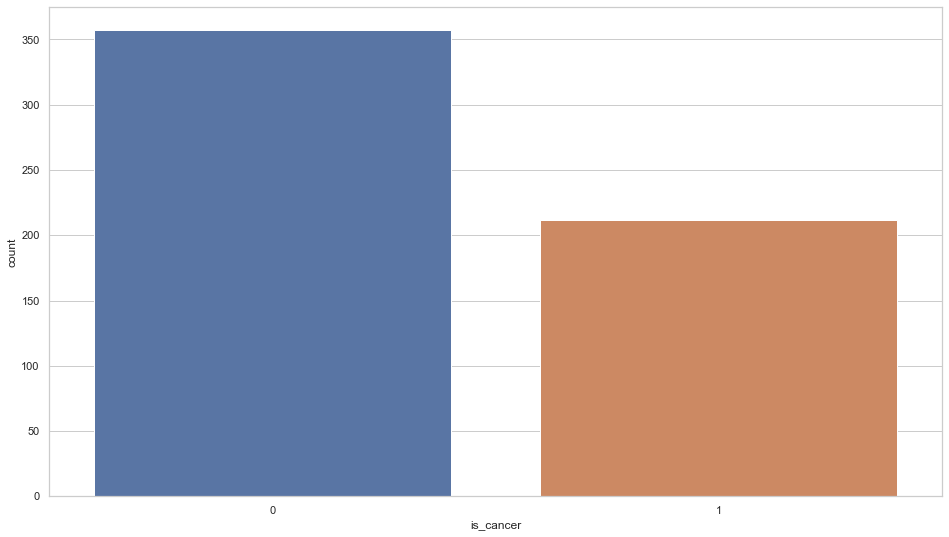

In [7]:
sns.countplot(x=df_2.is_cancer);

## Logistic regression
Logistic regression is one of the most popular and used algorithms for classification problems. Since it is also relatively uncomplicated and easy to implement, it is often used as a starting model, although it can also produce very high-performance results used in production. Here we are going to talk about Binomial Logistic Regression, which is used for binary results. Multinomial Logistic Regression exists and can be used for multiclass classification problems, but it is used less frequently. We will not cover it in this lesson.

Logistic regression is actually a transformed linear regression function. We can see in the image below that if we tried to fit a linear regression to some data with a binary result, we would fit a line that does not predict very well for any value that is not in the extreme values: in the middle there is a lot of area where the line is very far from the points. To make our function closer to the data, we have to transform the function we are using. In this case, it is useful to use a sigmoid function, which estimates an "S" shape. Now we can see that our line fits the data much better.

![regresiónlogística](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

Refs:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html     
https://techdifferences.com/difference-between-linear-and-logistic-regression.html    
https://stackoverflow.com/questions/12146914/what-is-the-difference-between-linear-regression-and-logistic-regression

## Let's do it

Let's try to predict `is_cancer` using only `mean_radius` as a predictor.

In [34]:
columns_for_subset = ["mean_radius", "is_cancer", "mean_texture"]
df_2[columns_for_subset]

,mean_radius,is_cancer,mean_texture
0,17.99,1,10.38
1,20.57,1,17.77
2,19.69,1,21.25
3,11.42,1,20.38
4,20.29,1,14.34
...,...,...,...
564,21.56,1,22.39
565,20.13,1,28.25
566,16.60,1,28.08
567,20.60,1,29.33


In [37]:
df = df_2[["mean_radius", "is_cancer"]] #subset of a df by passing a LIST of columns
#otherwise, one bracket would give me one series
df.sample(5)

,mean_radius,is_cancer
229,12.830,1
363,16.500,0
539,7.691,0
208,13.110,0
130,12.190,0


### Let's train a model

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
log = LogisticRegression()

In [12]:
log

LogisticRegression()

In [18]:
X = df[["mean_radius"]] #X always is dataframe even if it's even one column

In [15]:
y = df["is_cancer"]

In [41]:
model = log.fit(X, y)

In [40]:
df.sample()

,mean_radius,is_cancer
80,11.45,0


In [43]:
# ValueError: Expected 2D array, got 1D array instead
# -> turn it into a dataframe

In [52]:
df["y_pred"] = model.predict(df[["mean_radius"]])

In [57]:
df.sample(5)

,mean_radius,is_cancer,y_pred
557,9.423,0,0
518,12.880,0,0
487,19.440,1,1
511,14.810,0,1
471,12.040,0,0


### Let's create a prediction column for the entire dataframe

In [47]:
# y_pred
df["prediction"] = model.predict(df[["mean_radius"]])

### Confusion matrix with our data

In [58]:
pd.crosstab(
    df.is_cancer, #the truth
    df.y_pred # prediction
)

y_pred,0,1
is_cancer,,
0,333,24
1,45,167


* 333 - We have predicted NO and it is NO
* 24 - We have predicted YES and it is No
* 45 - We have preached NO and it is YES* 167 - We have predicted YES and it is Yes

In [59]:
import numpy as np

In [68]:
x = np.linspace(df.mean_radius.min(), df.mean_radius.max(), 100)
y = log.predict(x.reshape(-1, 1)) 
# Reshaping because: valueError: Expected 2D array, got 1D array instead

In [ ]:
#linspace -> creates a linear space, it ranges from min to max, with X number of units

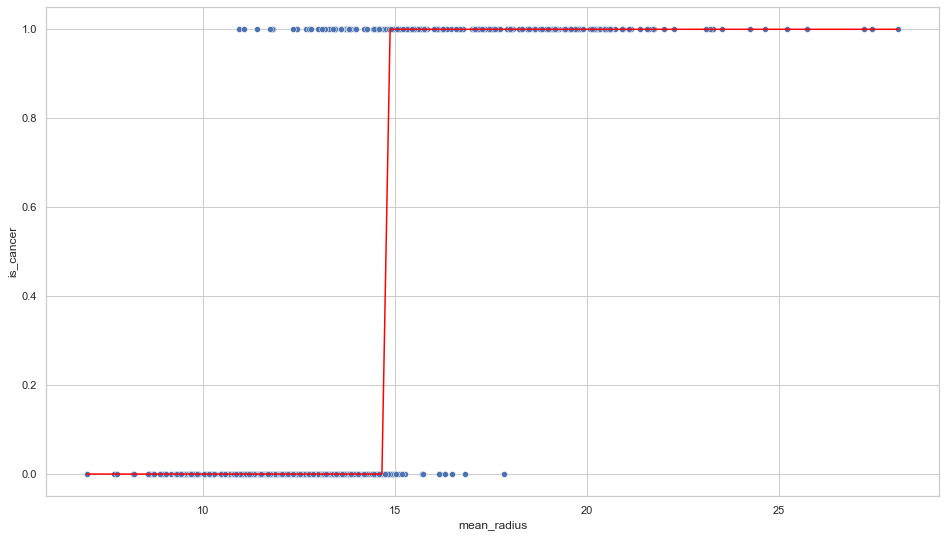

In [69]:
sns.scatterplot(x=df.mean_radius, y=df.is_cancer)
plt.plot(x, y, c="red");

In [70]:
# On the zero, the error are the values set to the right
# On the one, the error are the values set to the left
# Whatever is on the red line is the accurate prediction

## We do the same with many predictors

### Review of Train Test Split / DIVISION IN TRAIN TEST

![divisióntraintest](../images/traintest.png)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [71]:
from sklearn.model_selection import train_test_split

In [74]:
data = pd.read_csv("../datasets/breast_cancer.csv")
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [82]:
X = data.drop(columns="is_cancer")# DARAFRAME: [[]], double brackets -> subset

In [83]:
y = data["is_cancer"] #SERIES

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
X_train.shape[0] == y_train.shape[0]

True

In [90]:
X_test.shape[0] == y_test.shape[0]

True

In [91]:
log = LogisticRegression()

In [92]:
log.fit(X_train, y_train)

LogisticRegression()

In [99]:
y_pred = log.predict(X_test)

In [100]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0])

In [101]:
y_pred_all = log.predict(X)

Kit-kat (max iter)
I get this warning... we'll see hyperparameter tuning, but basically I have to scale my data or make the model more complex with more iterations.
```
/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status =1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
```

### Let's see what we got
#### part of train

#### test part

## Predict Proba

In [105]:
data_prob = pd.DataFrame([X_test.iloc[0]])
data_prob

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
204,12.47,18.6,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875


In [107]:
log.predict_proba(data_prob)

array([[0.86123342, 0.13876658]])

In [ ]:
#array([[prob_getting_zero, prob_getting_one]])

In [ ]:
# Difference between: log.predict & log.predict_proba
    # log.predict: 0, 1
    # log.predict_proba: [p_zero, p_one]

In [108]:
data_prob["y_pred"] = log.predict(data_prob)

In [110]:
data_prob

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,y_pred
204,12.47,18.6,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875,0


## Metrics!

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix

### Confusion matrix

Confusion Matrix
We are going to explain how the confusion matrix works with a hypothetical marketing example. In this example, we contact 100 customers and 80 of them tell us that they are not interested and 20 of them that they are.

Our model (in the example) is not very good, although depending on what metric we use it might appear to be better than it is.

We have used as values ​​of the binary classification:

- 0: not interested
- 1: yes you are interested

![matrizdeconfusión](https://www.iartificial.net/wp-content/uploads/2019/11/Matriz-Confusion-Ejemplo.webp)

In the confusion matrix on the left you can see the values ​​for this example. In the confusion matrix on the right, the generic names when we use the English nomenclature: True Negative [TN], True Positive [TP], False Positive [FP], False Negative [FN].

Tip: to easily remember the confusion matrix:

Positive (Positive) or Negative (Negative): refers to the prediction. If the model predicts 1 then it will be positive, and if it predicts 0 it will be negative.
True (True) or False (False): refers to whether the prediction is correct or not.

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/conf_matrix.png">

Equivalent with sklearn

In [111]:
from sklearn.metrics import confusion_matrix

In [113]:
confusion_matrix(
y_test,
y_pred)

array([[67,  3],
       [ 6, 38]])

### Accuracy

Accuracy measures the percentage of cases that the model has got right. This is one of the most used and favorite metrics… that I recommend you avoid! The problem with accuracy is that it can lead to deception, that is, it can make a bad model appear to be much better than it is.
The problem of using accuracy on unbalanced data.....

• Example: In a data set with 990 positives and 10
negatives, a classifier that always predicts “positive”,
would have a 0.99 hit rate And yet it's bad!

Represents the proportion of samples correctly predicted
 * The most common metric for ranking 🤔👀* It is useful when
  - the data set has balanced classes (similar proportion of True and False)
  - there is symmetry between True and False (for example, prediction of "male" or "female")
 * **Often misused!** since:
  - many problems are not symmetrical (for example, cancer vs. non-cancer)

The accuracy is calculated with the following formula:

$$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
accuracy_score(
y_test,
y_pred)

0.9210526315789473

In [119]:
# ACCURACY: PROPORTION OF SAMPLES CORRECTLY PREDICTED

Interpreting this metric, we see that the model has been correct 96% of the diagnoses, that is, it will be wrong 4% of the times it predicts.

### Precision

With the precision metric we can measure the quality of the machine learning model in classification tasks. In the example, it means that accuracy is the answer to the question: what percentage of the customers we contact will be interested?

To calculate the precision we will use the following formula:

$$precision = \frac{TP}{TP + FP}$$

It is the fraction of predicted positive events that are actually positive as shown below

This metric is defined as the number of true positive cases over the total number of everything you said was positive. In other words, of everything that the algorithm predicted as positive, it evaluates how much of it was true. One of the examples proposed [here](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9) is to mark an email as spam, when it really was not. Imagine that an anti-spam system has a low precision and marks an email as spam even though it is not, and you end up not reading your sister's wedding invitation.
One of the cases where this metric can be used, as the post says, is when the number of false positives has a very important impact. Imagine a classifier that mistakes a diagnosis and you end up amputating a patient's healthy leg.

This image marks the data sets selected when calculating precision.

<img src="https://www.iartificial.net/wp-content/uploads/2019/11/precision.webp">

Precision = Percentage of POSITIVE predictions that were correct.
What proportion of the predicted Positives is actually Positive?
We have to look at the total number of predicted Positives (True Positives plus False Positives, TP+FP), and see how many of them are True Positives (TP).

In [121]:
from sklearn.metrics import precision_score

In [122]:
precision_score (
    y_test,
    y_pred)

0.926829268292683

In [123]:
# Accuracy: 0.9210526315789473 #proportion of correctly predicted
# Precision: 0.926829268292683 #out of the positives, which ones were actually positive

### Recall

The recall metric will inform us about the amount that the machine learning model is capable of identifying. In the example, it refers to the fact that recall is the answer to the question: what percentage of customers are interested are we able to identify?

To calculate recall we will use the following formula:

$$recall = \frac{TP}{TP + FN}$$

<img src="https://www.iartificial.net/wp-content/uploads/2019/11/recall-exhaustividad.webp">

It answers a different question: what proportion of real positives is correctly classified?
Percentage of positive cases that I have captured.

In [125]:
from sklearn.metrics import recall_score

In [126]:
recall_score (y_test,
             y_pred)

0.8636363636363636

### Differentiating precision and recall
Despite being similar, they have subtle distinctions.

- Precision: How many times is what my model says really true?
- Recall: How many times is my model able to identify the truth?

Precision focuses on what the model says and then compares it to reality. On the other hand, recall starts from reality, and then evaluates how good the model is at recognizing it.

### F1 Score

The F1 value is used to combine the precision and recall measurements into a single value. This is handy because it makes it easier to compare the combined accuracy and recall performance between various solutions.

F1 is calculated by taking the harmonic mean between precision and recall:

$$F1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$

In [ ]:
# QUANTITAIVE
    # MAE
    # MSE
    # RMSE
    
    # R2
    
    
# QUALITATIVE
    # ACCURACY
    # PRECISION
    # RECALL
    
    
    # F1

In [127]:
from sklearn.metrics import f1_score

In [128]:
f1_score(y_test, y_pred)

0.8941176470588236

In [129]:
# FOR REGRESSION: errors & r2
# FOR CLASSIFICATION: accuracy (precision, recall -> ) & f1

I have extracted documentation of the metrics from [this](https://www.iartificial.net/precision-recall-f1-accuracy-in-classification/) exceptionally explained article.
But here I leave you more:
- https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
- https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/
- https://wiki.pathmind.com/accuracy-precision-recall-f1

## Other classification models

In [131]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC #SVR

In [ ]:
# Logisitc Regression

In [132]:
models = {
    "disc_analysis": LinearDiscriminantAnalysis(),
    "knc": KNeighborsClassifier(),
    "gaus" :GaussianNB(),
    "decision-tree-classifier": DecisionTreeClassifier(),
    "svc": SVC()
}

In [133]:
for name, model in models.items():
    print("Traning model: ", model)
    model.fit(X_train, y_train)

Traning model:  LinearDiscriminantAnalysis()
Traning model:  KNeighborsClassifier()
Traning model:  GaussianNB()
Traning model:  DecisionTreeClassifier()
Traning model:  SVC()


## We make predictions and measure

In [148]:
for name, model in models.items():
    print(f"------------------")
    print("Fitting model: ", model)
    #model.fit(X_train, y_train), even though it's already fitted
    print("Predicting model: ", model)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 score: {f1_score(y_test, y_pred)}")

------------------
Fitting model:  LinearDiscriminantAnalysis()
Predicting model:  LinearDiscriminantAnalysis()
Accuracy: 0.956140350877193
Precision: 1.0
Recall: 0.8863636363636364
F1 score: 0.9397590361445783
------------------
Fitting model:  KNeighborsClassifier()
Predicting model:  KNeighborsClassifier()
Accuracy: 0.9122807017543859
Precision: 0.925
Recall: 0.8409090909090909
F1 score: 0.8809523809523809
------------------
Fitting model:  GaussianNB()
Predicting model:  GaussianNB()
Accuracy: 0.9473684210526315
Precision: 0.9523809523809523
Recall: 0.9090909090909091
F1 score: 0.9302325581395349
------------------
Fitting model:  DecisionTreeClassifier()
Predicting model:  DecisionTreeClassifier()
Accuracy: 0.9473684210526315
Precision: 0.9130434782608695
Recall: 0.9545454545454546
F1 score: 0.9333333333333332
------------------
Fitting model:  SVC()
Predicting model:  SVC()
Accuracy: 0.9122807017543859
Precision: 1.0
Recall: 0.7727272727272727
F1 score: 0.8717948717948718


In [137]:
# Highest f1 score: DecisionTreeClassifier()
# It's the one that relates precision and recall

# Medicine -> may want to look at recall instead of other metrics

## Summary
It's your turn, what have we learned today?

- Datasets: regression & classification
- X, y
- Split
- Fit
- Predict
- Error: evaluate how good the model is

- We try:
    - Different splits: cross-validation
    - Different models: 

- Different parameters
- Different ways in which we can have the data: 
    normalization, standarization, encoding (categorical -> numerical)

In [151]:
# Summmary
data["diagnosis"] = log.predict(X)
data

In [153]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,1


## Pipeline
Of things we have to do it would be...:

